<img src="./img/logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo semanal 7
#### Tomas A. Albanesi


## Indice de contenidos:
* [1. Consigna Punto 1](#consignaPunto1)
    * [1.1. Consigna Ejercicio TP5 #2](#consignaEjercicioTP5_2)
        * [1.1.A. Resolucion item A](#resolucionEjercicioTP5_2_A)
        * [1.1.B. Resolucion item B](#resolucionEjercicioTP5_2_B)
        * [1.1.C. Resolucion item C](#resolucionEjercicioTP5_2_C)
        * [1.1.D. Resolucion item D](#resolucionEjercicioTP5_2_D)
    * [1.2. Consigna Ejercicio TP5 #3](#consignaEjercicioTP5_3)
        * [1.2.A. Resolucion item A](#resolucionEjercicioTP5_3_A)
        * [1.2.B. Resolucion item B](#resolucionEjercicioTP5_3_B)
* [2. Consigna Punto 2](#consignaPunto2)
* [3. Conclusiones generales](#conclusiones)

## 1. Consigna Punto 1 <a class="anchor" id="consignaPunto1"></a>

<img src="./img/ConsignaPunto1.png" width="1000" />

## 1.1. Consigna Ejercicio TP5 #2 <a class="anchor" id="consignaEjercicioTP5_2"></a>

<img src="./img/Consigna.png" width="1000" />

## 1.1.A. Resolucion item A <a class="anchor" id="resolucionEjercicioTP5_2_A"></a>

#### Resolución analítica

La funcion de transferencia de un filtro pasa bajos Butterworth de 2do orden, previamente conocida es:

$H(S) = \frac{1}{S^2+S.\sqrt{2}+1}$

Si tenemos en cuenta que la funcion de aproximación de Butter es normalizada, como nos dan como dato la frecuencia de corte $f_c$ podemos desnormalizarlo:

$S=\frac{s}{2\pi.f_c}$

Siendo $f_c = 1KHz$

$H(s) = \frac{1}{(\frac{s}{2\pi.f_c})^2+(\frac{s}{2\pi.f_c}).\sqrt{2}+1}$

$H(s) = \frac{1}{\frac{s^2}{(2\pi.f_c)^2}+\frac{s}{2\pi.f_c}.\sqrt{2}+1}$

$H(s) = \frac{(2\pi.f_c)^2}{s^2+s.\sqrt{2} . 2\pi.f_c+(2\pi.f_c)^2}$

Ahora, podemos aplicar la transformada bilineal:

$s = k . \frac{z-1}{z+1}$

Siendo $k = 2.f_s$

$H(z) = \frac{(2\pi.f_c)^2}{(k . \frac{z-1}{z+1})^2+k . \frac{z-1}{z+1} .\sqrt{2} . 2\pi.f_c+(2\pi.f_c)^2}$

$H(z) = \frac{(2\pi.f_c)^2}{\frac{k^2}{(z+1)^2}((z-1)^2+(z-1).(z+1).\frac{\sqrt{2}.2\pi.f_c}{k}+(z+1)^2.(\frac{2\pi.f_c}{k})^2)}$


Si renombramos la siguiente expresión común para simplificar:

$C = \frac{2\pi.f_c}{k}$

$H(z) = \frac{(z^2+2.z+1).C^2}{z^2-2.z+1+(z^2-1).\sqrt{2}.C+(z^2+2.z+1).C^2}$

\begin{equation}
H(z)= \frac{z^2 .C^2+z.2.C^2+.C^2}{z^2.(1+\sqrt{2}.C+C^2)+z.(2.C^2-2)+(1+C^2-\sqrt{2}.C)}
\end{equation}

#### Simulación numérica

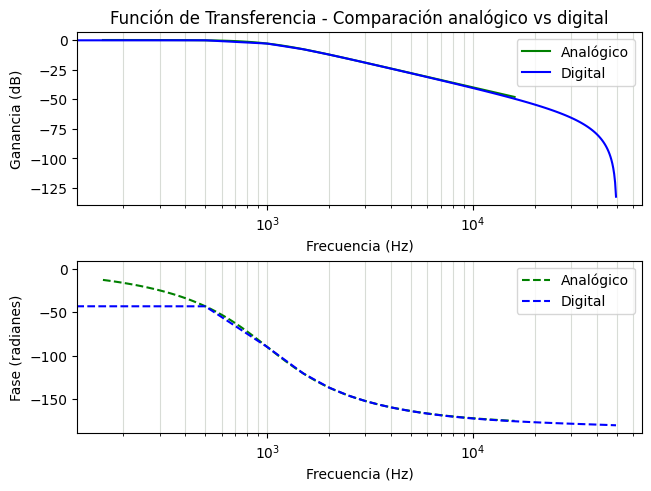

(3, <Axes: xlabel='$\\Re(z)$', ylabel='$\\Im(z)$'>)

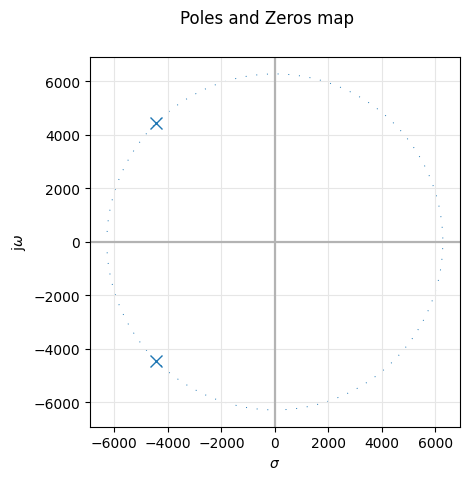

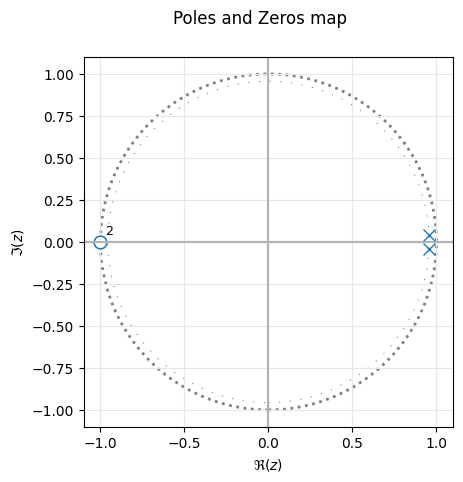

In [3]:
# Importacion de modulos y funciones
import matplotlib.pyplot as plt
import scipy.signal as sig
import numpy as np
from pytc2.sistemas_lineales import pzmap

# Frecuencias
fc = 1*10**3
fs = 100*10**3

# Constantes
k = 2 * fs
C = (2*np.pi*fc)/k
CC = C**2

# Armo filtro analogico
analog_num = [(2*np.pi*fc)**2]
analog_den = [1,(np.sqrt(2)*2*np.pi*fc),(2*np.pi*fc)**2]
analog_sys = sig.TransferFunction(analog_num, analog_den)

# Armo filtro digital
digital_num = [CC,2*CC,CC]
digital_den = [(1+np.sqrt(2)*C+CC),(2*CC-2),(1+CC-np.sqrt(2)*C)]
digital_sys = sig.TransferFunction(digital_num, digital_den, dt=1/fs)

# Inicializacion de figura
fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True)

# Obtencion de bode
w_a, mag_a, phase_a = analog_sys.bode()
w_d, mag_d, phase_d = sig.dbode(digital_sys)

# Graficos de modulo
ax1.semilogx(w_a/(2*np.pi), mag_a, color='g', label='Analógico')
ax1.semilogx(w_d/(2*np.pi), mag_d, color='b', label='Digital') 
ax1.set_title('Función de Transferencia - Comparación analógico vs digital')
ax1.set_xlabel('Frecuencia (Hz)')
ax1.set_ylabel('Ganancia (dB)')
ax1.grid(True, which='both', axis='x', color='xkcd:light grey')
ax1.legend()

# Graficos de fase
ax2.semilogx(w_a/(2*np.pi), phase_a, color='g', label='Analógico', linestyle='dashed')
ax2.semilogx(w_d/(2*np.pi), phase_d, color='b', label='Digital', linestyle='dashed')
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('Fase (radianes)')
ax2.grid(True, which='both', axis='x', color='xkcd:light grey')
ax2.legend()

plt.show()

# Diagrama de polos y ceros analogico
pzmap(analog_sys, fig_id=2)

# Diagrama de polos y ceros digital
pzmap(digital_sys, fig_id=3)

## 1.1.B. Resolucion item B <a class="anchor" id="resolucionEjercicioTP5_2_B"></a>

#### Simulación numérica

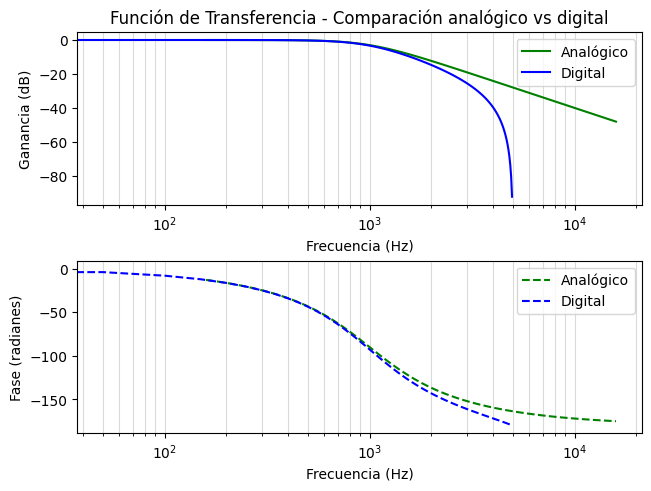

(3, <Axes: xlabel='$\\Re(z)$', ylabel='$\\Im(z)$'>)

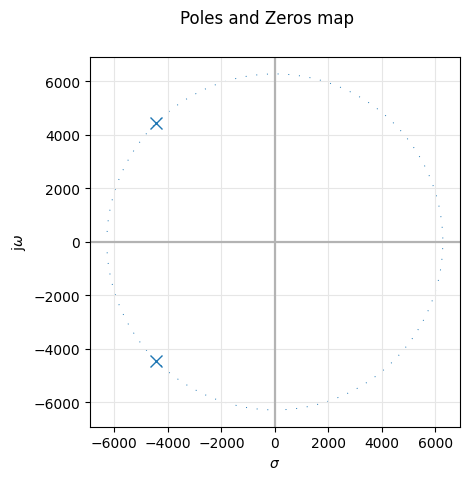

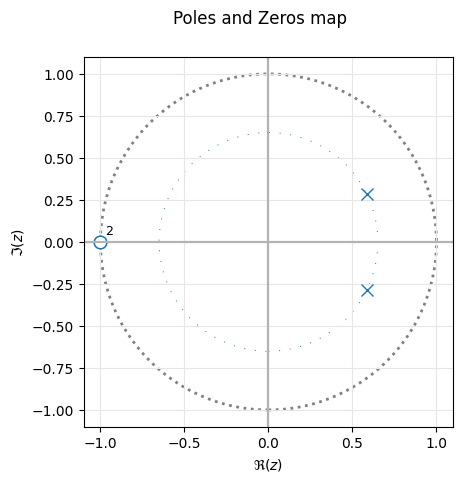

In [4]:
# Frecuencias
fc = 1*10**3
fs = 10*10**3

# Constantes
k = 2 * fs
C = (2*np.pi*fc)/k
CC = C**2

# Armo filtro analogico
analog_num = [(2*np.pi*fc)**2]
analog_den = [1,(np.sqrt(2)*2*np.pi*fc),(2*np.pi*fc)**2]
analog_sys = sig.TransferFunction(analog_num, analog_den)

# Armo filtro digital
digital_num = [CC,2*CC,CC]
digital_den = [(1+np.sqrt(2)*C+CC),(2*CC-2),(1+CC-np.sqrt(2)*C)]
digital_sys = sig.TransferFunction(digital_num, digital_den, dt=1/fs)

# Inicializacion de figura
fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True)

# Obtencion de bode
w_a, mag_a, phase_a = analog_sys.bode()
w_d, mag_d, phase_d = sig.dbode(digital_sys)

# Graficos de modulo
ax1.semilogx(w_a/(2*np.pi), mag_a, color='g', label='Analógico')
ax1.semilogx(w_d/(2*np.pi), mag_d, color='b', label='Digital') 
ax1.set_title('Función de Transferencia - Comparación analógico vs digital')
ax1.set_xlabel('Frecuencia (Hz)')
ax1.set_ylabel('Ganancia (dB)')
ax1.grid(True, which='both', axis='x', color='xkcd:light grey')
ax1.legend()

# Graficos de fase
ax2.semilogx(w_a/(2*np.pi), phase_a, color='g', label='Analógico', linestyle='dashed')
ax2.semilogx(w_d/(2*np.pi), phase_d, color='b', label='Digital', linestyle='dashed')
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('Fase (radianes)')
ax2.grid(True, which='both', axis='x', color='xkcd:light grey')
ax2.legend()

plt.show()

# Diagrama de polos y ceros analogico
pzmap(analog_sys, fig_id=2)

# Diagrama de polos y ceros digital
pzmap(digital_sys, fig_id=3)

## 1.1.C. Resolucion item C <a class="anchor" id="resolucionEjercicioTP5_2_C"></a>

#### Resolucion analítica

La funcion de transferencia de un filtro pasa bajos Butterworth de 2do orden, previamente conocida es:

$H(S) = \frac{S^2}{S^2+S.\sqrt{2}+1}$

Si tenemos en cuenta que la funcion de aproximación de Butter es normalizada, como nos dan como dato la frecuencia de corte $f_c$ podemos desnormalizarlo:

$S=\frac{s}{2\pi.f_c}$

Siendo $f_c = 6KHz$

$H(s) = \frac{\frac{s^2}{(2\pi.f_c)^2}}{\frac{s^2}{(2\pi.f_c)^2}+\frac{s}{2\pi.f_c}.\sqrt{2}+1}$

$H(s) = \frac{s^2}{s^2+s.\sqrt{2}.2\pi.f_c+(2\pi.f_c)^2}$

Ahora, aplicando la transformada bilineal:

$s = k . \frac{z-1}{z+1}$

Siendo $k = 2.f_s$

$H(z) = \frac{k^2.\frac{(z-1)^2}{(z+1)^2}}{k^2.\frac{(z-1)^2}{(z+1)^2}+k.\frac{z-1}{z+1}.\sqrt{2}.2\pi.f_c+(2\pi.f_c)^2}$

$H(z) = \frac{\frac{k^2}{(z+1)^2}.(z-1)^2}{\frac{k^2}{(z+1)^2}.((z-1)^2+(z-1).(z+1).\sqrt{2}.\frac{2\pi.f_c}{k}+(z+1)^2.(\frac{2\pi.f_c}{k})^2)}$

Renombrando para simplificar:

$C = \frac{2\pi.f_c}{k}$

$H(z) = \frac{z^2-2.z+1}{z^2-2.z+1+(z^2-1).\sqrt{2}.C+(z^2+2.z+1).C^2}$

$H(z) = \frac{z^2-2.z+1}{z^2.(1+\sqrt{2}.C+C^2)+z.(2.C^2-2)+(1+C^2-\sqrt{2}.C)}$

#### Simulación numérica CASO A) $f_s = 100KHz$

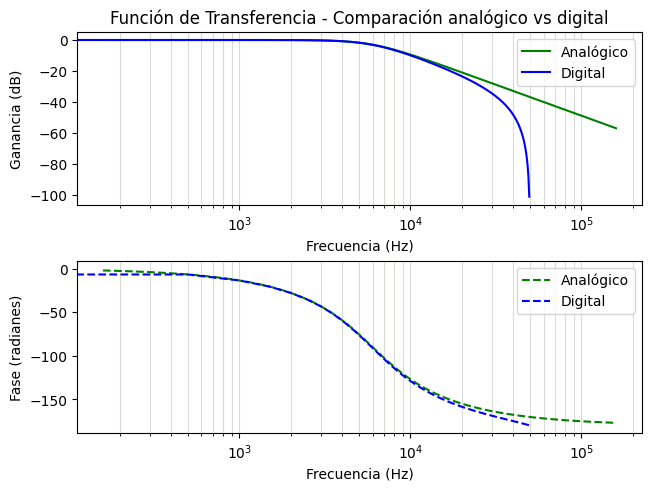

(3, <Axes: xlabel='$\\Re(z)$', ylabel='$\\Im(z)$'>)

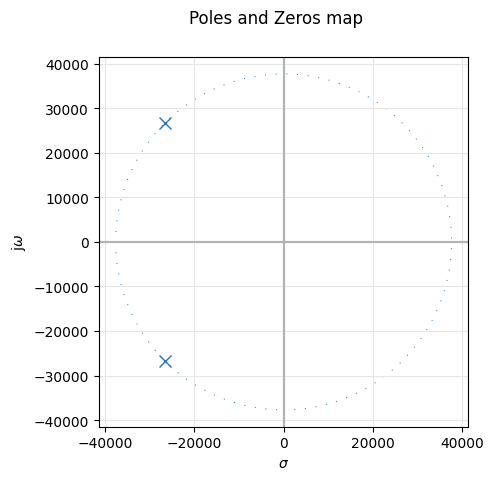

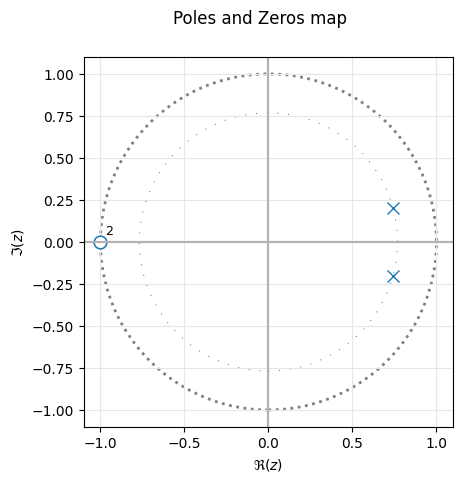

In [5]:
# Frecuencias
fc = 6*10**3
fs = 100*10**3

# Constantes
k = 2 * fs
C = (2*np.pi*fc)/k
CC = C**2

# Armo filtro analogico
analog_num = [(2*np.pi*fc)**2]
analog_den = [1,(np.sqrt(2)*2*np.pi*fc),(2*np.pi*fc)**2]
analog_sys = sig.TransferFunction(analog_num, analog_den)

# Armo filtro digital
digital_num = [CC,2*CC,CC]
digital_den = [(1+np.sqrt(2)*C+CC),(2*CC-2),(1+CC-np.sqrt(2)*C)]
digital_sys = sig.TransferFunction(digital_num, digital_den, dt=1/fs)

# Inicializacion de figura
fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True)

# Obtencion de bode
w_a, mag_a, phase_a = analog_sys.bode()
w_d, mag_d, phase_d = sig.dbode(digital_sys)

# Graficos de modulo
ax1.semilogx(w_a/(2*np.pi), mag_a, color='g', label='Analógico')
ax1.semilogx(w_d/(2*np.pi), mag_d, color='b', label='Digital') 
ax1.set_title('Función de Transferencia - Comparación analógico vs digital')
ax1.set_xlabel('Frecuencia (Hz)')
ax1.set_ylabel('Ganancia (dB)')
ax1.grid(True, which='both', axis='x', color='xkcd:light grey')
ax1.legend()

# Graficos de fase
ax2.semilogx(w_a/(2*np.pi), phase_a, color='g', label='Analógico', linestyle='dashed')
ax2.semilogx(w_d/(2*np.pi), phase_d, color='b', label='Digital', linestyle='dashed')
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('Fase (radianes)')
ax2.grid(True, which='both', axis='x', color='xkcd:light grey')
ax2.legend()

plt.show()

# Diagrama de polos y ceros analogico
pzmap(analog_sys, fig_id=2)

# Diagrama de polos y ceros digital
pzmap(digital_sys, fig_id=3)

#### Simulación numérica CASO B) $f_s = 10KHz$

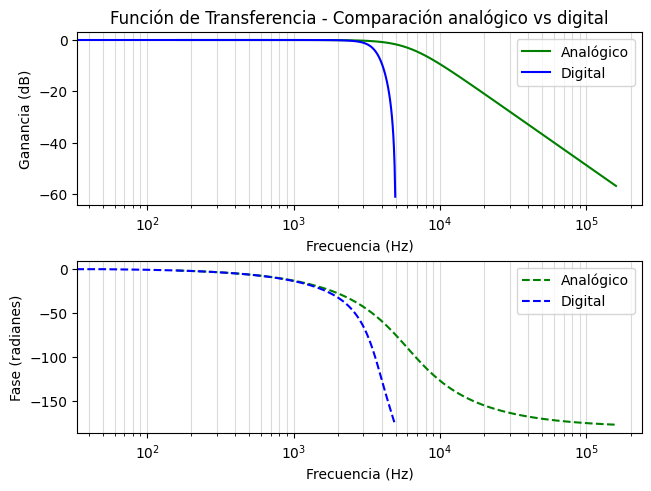

(3, <Axes: xlabel='$\\Re(z)$', ylabel='$\\Im(z)$'>)

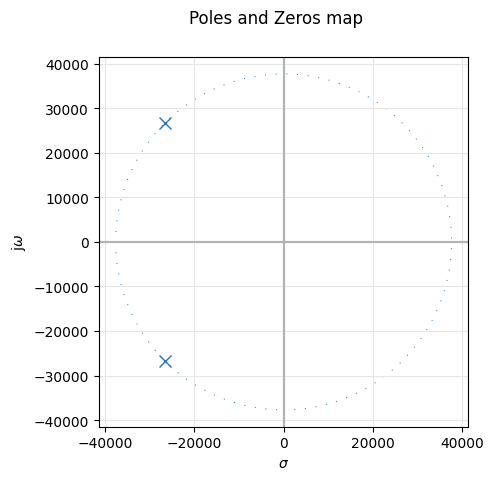

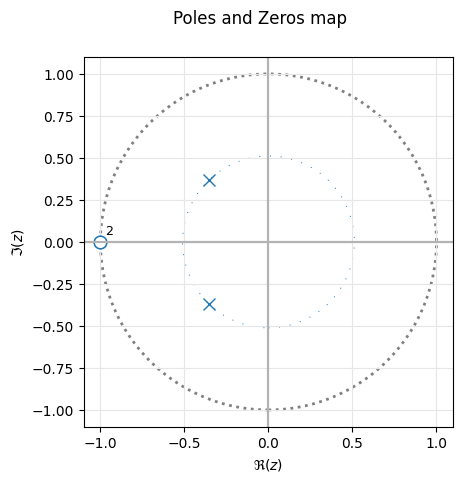

In [6]:
# Frecuencias
fc = 6*10**3
fs = 10*10**3

# Constantes
k = 2 * fs
C = (2*np.pi*fc)/k
CC = C**2

# Armo filtro analogico
analog_num = [(2*np.pi*fc)**2]
analog_den = [1,(np.sqrt(2)*2*np.pi*fc),(2*np.pi*fc)**2]
analog_sys = sig.TransferFunction(analog_num, analog_den)

# Armo filtro digital
digital_num = [CC,2*CC,CC]
digital_den = [(1+np.sqrt(2)*C+CC),(2*CC-2),(1+CC-np.sqrt(2)*C)]
digital_sys = sig.TransferFunction(digital_num, digital_den, dt=1/fs)

# Inicializacion de figura
fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True)

# Obtencion de bode
w_a, mag_a, phase_a = analog_sys.bode()
w_d, mag_d, phase_d = sig.dbode(digital_sys)

# Graficos de modulo
ax1.semilogx(w_a/(2*np.pi), mag_a, color='g', label='Analógico')
ax1.semilogx(w_d/(2*np.pi), mag_d, color='b', label='Digital') 
ax1.set_title('Función de Transferencia - Comparación analógico vs digital')
ax1.set_xlabel('Frecuencia (Hz)')
ax1.set_ylabel('Ganancia (dB)')
ax1.grid(True, which='both', axis='x', color='xkcd:light grey')
ax1.legend()

# Graficos de fase
ax2.semilogx(w_a/(2*np.pi), phase_a, color='g', label='Analógico', linestyle='dashed')
ax2.semilogx(w_d/(2*np.pi), phase_d, color='b', label='Digital', linestyle='dashed')
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('Fase (radianes)')
ax2.grid(True, which='both', axis='x', color='xkcd:light grey')
ax2.legend()

plt.show()

# Diagrama de polos y ceros analogico
pzmap(analog_sys, fig_id=2)

# Diagrama de polos y ceros digital
pzmap(digital_sys, fig_id=3)

## 1.1.D. Resolucion item D <a class="anchor" id="resolucionEjercicioTP5_2_D"></a>

De todos los casos, conviene aplicar prewarping en el último ya que en este se nota una deformación apreciable en cerca de la frecuencia de corte mientras que, en los que se muestrea a 100KHz casi no se aprecia deformación y en el pasabajos muestreado a 10KHz la deformación se produce lejos de la frecuencia de corte.

## 1.2. Consigna Ejercicio TP5 #3 <a class="anchor" id="consignaEjercicioTP5_3"></a>

<img src="./img/ConsignaTP5Ej3A.png" width="500" />
<img src="./img/ConsignaTP5Ej3B.png" width="500" />

## 1.2.A. Resolucion item A <a class="anchor" id="resolucionEjercicioTP5_3_A"></a>

#### Resolución analítica $h_1(n)$

Considerando que la transformada $Z$ por definición es:

$H(z) = \Sigma_{n=-\infty}^{\infty} h(n) . z^{-n}$

La expresión del filtro de media móvil en el dominio de la variable compleja Z queda de la siguiente forma:

$H_1(z) = h_1(0) . z^0 + h_1(1) . z^{-1}$

$H_1(z) = 1 + z^{-1}$

$H_1(z) = \frac{z + 1}{z}$

#### Simulación numérica $h_1(n)$

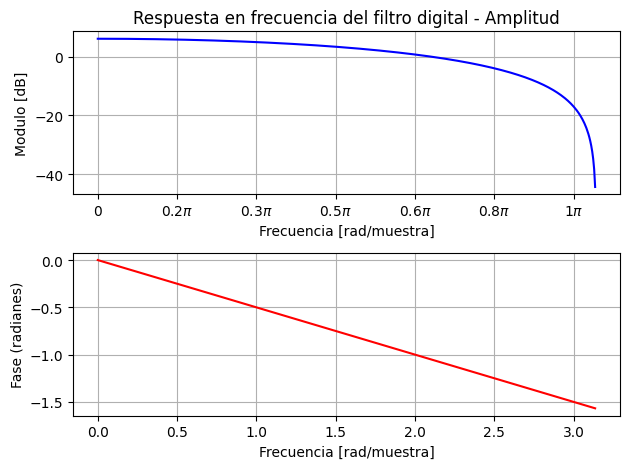

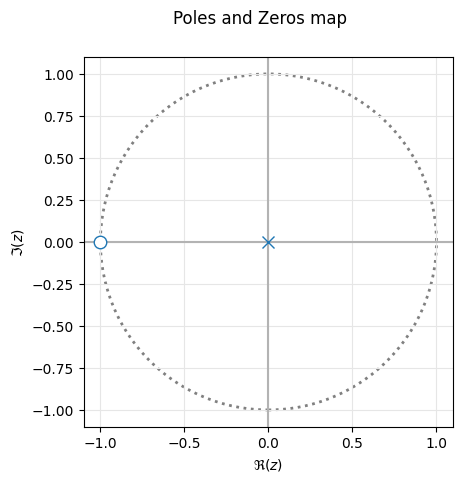

In [25]:
import matplotlib.pyplot as plt
import scipy.signal as sig
from pytc2.sistemas_lineales import pzmap
from matplotlib.ticker import FuncFormatter, MultipleLocator
import numpy as np

num = [1,1]
den = [1,0]
fs = 100*10**3

my_tf = sig.TransferFunction(num, den, dt=1/fs)

w, h = sig.freqz(num, den)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.set_title('Respuesta en frecuencia del filtro digital - Amplitud')
ax1.plot(w, 20 * np.log10(abs(h)), color='b')
ax1.set_ylabel('Modulo [dB]')
ax1.set_xlabel('Frecuencia [rad/muestra]')
ax1.grid()
ax1.axis('tight')
ax1.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))

angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'r')
ax2.set_ylabel('Fase (radianes)')
ax2.set_xlabel('Frecuencia [rad/muestra]')
ax2.grid()
ax2.axis('tight')
plt.tight_layout()
plt.show()

analog_fig_id, analog_axes_hdl = pzmap(my_tf)

#### Resolución analítica $h_2(n)$

$H_2(z)=h_1(0) . z^0 + h_1(1) . z^{-1} + h_1(2) . z^{-2}$

$H_2(z)=1 + z^{-1} + z^{-2}$

$H_2(z) = \frac{z^2 + z + 1}{z^2}$

#### Simulación numérica $h_2(n)$

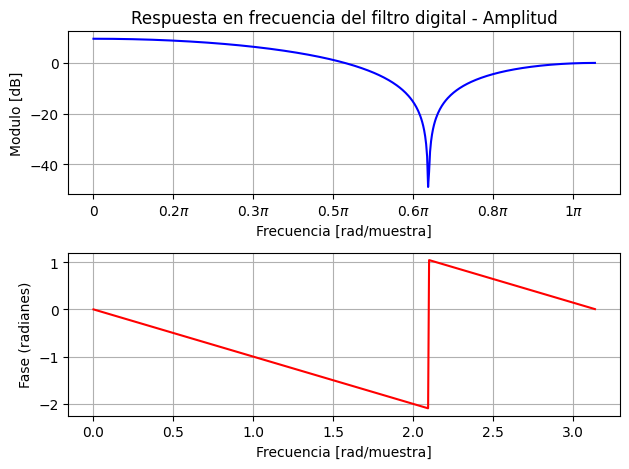

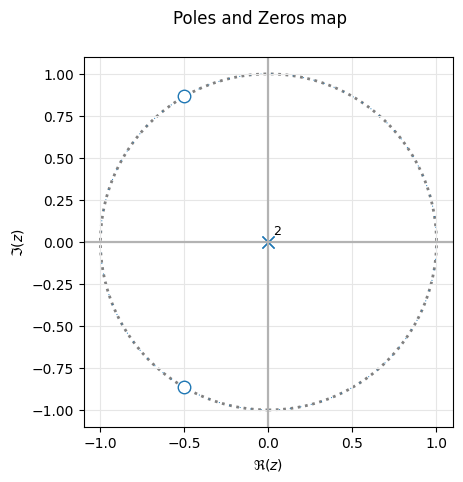

In [27]:
import matplotlib.pyplot as plt
import scipy.signal as sig
from pytc2.sistemas_lineales import pzmap
from matplotlib.ticker import FuncFormatter, MultipleLocator
import numpy as np

num = [1,1,1]
den = [1,0,0]
fs = 100*10**3

my_tf = sig.TransferFunction(num, den, dt=1/fs)

w, h = sig.freqz(num, den)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.set_title('Respuesta en frecuencia del filtro digital - Amplitud')
ax1.plot(w, 20 * np.log10(abs(h)), color='b')
ax1.set_ylabel('Modulo [dB]')
ax1.set_xlabel('Frecuencia [rad/muestra]')
ax1.grid()
ax1.axis('tight')
ax1.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))

angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'r')
ax2.set_ylabel('Fase (radianes)')
ax2.set_xlabel('Frecuencia [rad/muestra]')
ax2.grid()
ax2.axis('tight')
plt.tight_layout()
plt.show()

analog_fig_id, analog_axes_hdl = pzmap(my_tf)

#### Respuestas

1) Para que la salida represente la media aritmética, debe dividirse por la cantidad de muestras que hay presentes.
2) La frecuencia eliminada se corresponde con $\frac{6.\pi}{9}$. Por lo tanto $50Hz$ debe estar sobre esa frecuencia. Considerando que $\frac{f_s}{2}$ se corresponde con $\pi$, se despeja:

\begin{equation}
\frac{50Hz . \pi}{\frac{6.\pi}{9}} = \frac{f_s}{2}
\end{equation}

\begin{equation}
f_s = \frac{100Hz . 9}{6} = 150Hz
\end{equation}


## 1.2.B. Resolucion item B <a class="anchor" id="resolucionEjercicioTP5_3_B"></a>

#### Resolución analítica $h_1(n)$

$H_1(z) = h_1(0) . z^0 + h_1(1) . z^{-1}$

$H_1(z) = 1 - z^{-1}$

$H_1(z) = \frac{z - 1}{z}$

#### Simulación numérica $h_1(n)$

C:\Users\tomas\AppData\Local\Temp\ipykernel_11168\92063577.py:17: RuntimeWarning: divide by zero encountered in log10
  ax1.plot(w, 20 * np.log10(abs(h)), color='b')


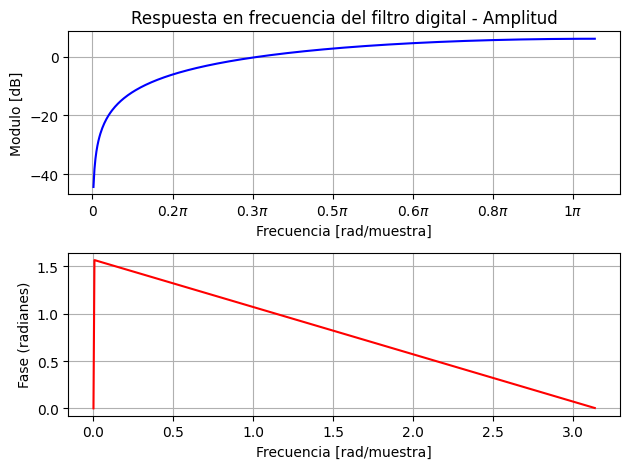

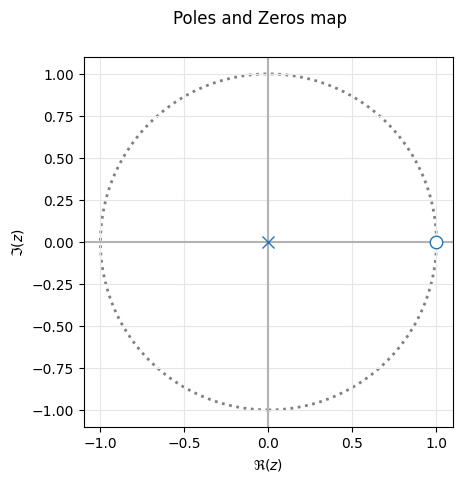

In [29]:
import matplotlib.pyplot as plt
import scipy.signal as sig
from pytc2.sistemas_lineales import pzmap
from matplotlib.ticker import FuncFormatter, MultipleLocator
import numpy as np

num = [1,-1]
den = [1,0]
fs = 100*10**3

my_tf = sig.TransferFunction(num, den, dt=1/fs)

w, h = sig.freqz(num, den)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.set_title('Respuesta en frecuencia del filtro digital - Amplitud')
ax1.plot(w, 20 * np.log10(abs(h)), color='b')
ax1.set_ylabel('Modulo [dB]')
ax1.set_xlabel('Frecuencia [rad/muestra]')
ax1.grid()
ax1.axis('tight')
ax1.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))

angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'r')
ax2.set_ylabel('Fase (radianes)')
ax2.set_xlabel('Frecuencia [rad/muestra]')
ax2.grid()
ax2.axis('tight')
plt.tight_layout()
plt.show()

analog_fig_id, analog_axes_hdl = pzmap(my_tf)

#### Resolución analítica $h_2(n)$

$H_2(z) = h_2(0) . z^0 + h_2(1) . z^{-1} + h_2(2) . z^{-2}$

$H_2(z) = 1 + 0 . z^{-1} - z^{-2}$

$H_2(z) = 1 - z^{-2}$

$H_2(z) = \frac{z^2 - 1}{z^2}$

#### Simulación numérica  $h_2(n)$

C:\Users\tomas\AppData\Local\Temp\ipykernel_11168\886718221.py:17: RuntimeWarning: divide by zero encountered in log10
  ax1.plot(w, 20 * np.log10(abs(h)), color='b')


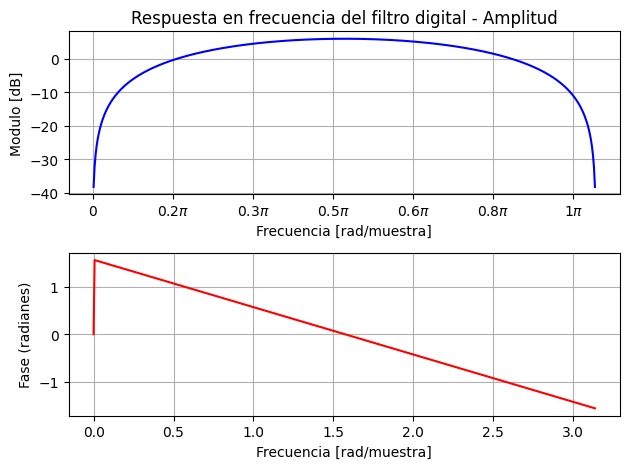

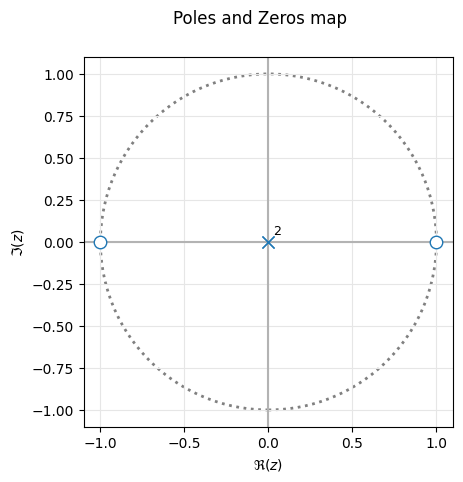

In [30]:
import matplotlib.pyplot as plt
import scipy.signal as sig
from pytc2.sistemas_lineales import pzmap
from matplotlib.ticker import FuncFormatter, MultipleLocator
import numpy as np

num = [1,0,-1]
den = [1,0,0]
fs = 100*10**3

my_tf = sig.TransferFunction(num, den, dt=1/fs)

w, h = sig.freqz(num, den)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.set_title('Respuesta en frecuencia del filtro digital - Amplitud')
ax1.plot(w, 20 * np.log10(abs(h)), color='b')
ax1.set_ylabel('Modulo [dB]')
ax1.set_xlabel('Frecuencia [rad/muestra]')
ax1.grid()
ax1.axis('tight')
ax1.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))

angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'r')
ax2.set_ylabel('Fase (radianes)')
ax2.set_xlabel('Frecuencia [rad/muestra]')
ax2.grid()
ax2.axis('tight')
plt.tight_layout()
plt.show()

analog_fig_id, analog_axes_hdl = pzmap(my_tf)

#### Respuestas

1) Ambos sistemas introducen una demora correspondiente al orden del sistema. El de orden 1 introduce una demora de una muestra y el de orden 2 una demora de 2 muestras.

2) El segundo sistema se comporta como un derivador ideal hasta $\Omega$ = 0.5515, pero presenta la ventaja de atenuar las altas frecuencias, disminuyendo así en una señal de baja frecuencia la inferencia del ruido en la diferencia. El primer sistema, deja pasar más facilmente las muestras de alta frecuencia que en el rango que se comporta como un derivador (parte lineal).

## 2. Consigna Punto 2 <a class="anchor" id="consignaPunto2"></a>

<img src="./img/ConsignaPunto2.png" width="1000" />

#### Resolución analítica parte A)

En primer lugar, debemos hallar la transferencia a partir del digrama en bloques:

\begin{equation}
X(z) \cdot Z
\end{equation}

#### Simulación numérica parte A)

#### Resolución analítica parte B)

#### Simulación numérica parte B)